In [42]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from helper.database_connection_helper import get_collection

collection = get_collection()

In [43]:
collection_filter = {
    '_id': '000bc7ea-8918-420c-bd13-30e1a6e8dd00'
}

000bc7ea-8918-420c-bd13-30e1a6e8dd00
Anzahl der Samples: 1000
Datentypen: defect_channel    float64
distance          float64
magnetization     float64
timestamp         float64
dtype: object


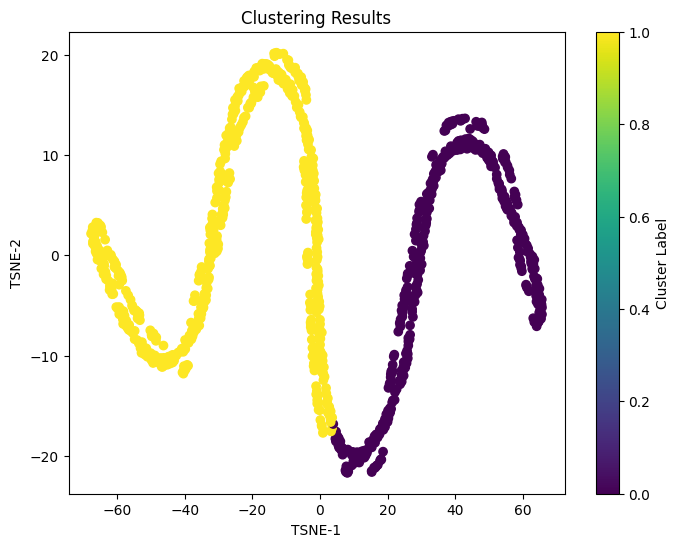

In [48]:
documents = collection.find(collection_filter)
    
all_data = []

for doc in documents:
    print(doc['_id'])
    
    # Hinzufügen der Daten aus jedem Dokument zur Liste
    for defect_channel, distance, magnetization, timestamp in zip(doc['defect_channel'], doc['distance'], doc['magnetization'], doc['timestamp']):
        all_data.append({
            'defect_channel': defect_channel,
            'distance': distance,
            'magnetization': magnetization,
            'timestamp': timestamp
        })
        
df = pd.DataFrame(all_data)

print("Anzahl der Samples:", df.shape[0])
print("Datentypen:", df.dtypes)

if 'timestamp' in df.columns:
    df = df.drop(columns=['timestamp'])

n_samples = df.shape[0]
perplexity_value = min(30, max(5, int(n_samples / 3)))  # Perplexität basierend auf der Anzahl der Samples, aber mindestens 5

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_results = tsne.fit_transform(df)

kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(tsne_results)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Clustering Results")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.colorbar(label='Cluster Label')
plt.show()